In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTENC
import mlflow


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('dataset/final_clean_encoded.csv')

In [4]:
df.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Hour_of_Day', 'Accident_Severity'],
      dtype='object')

#### Feature Encoding

In [4]:
data = df.drop('Accident_Severity', axis = 1)

labels = df['Accident_Severity']

#### Spillting Data into training and testing data


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.25, random_state = 42, stratify = labels)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9237, 31)
(3079, 31)
(9237,)
(3079,)


In [7]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Set tracking URI for MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Start MLflow experiment
mlflow.set_experiment("logistic_regression_experiment")

# Define hyperparameters
C = 0.1
penalty = 'l2'

# Train model
with mlflow.start_run():
    # Create logistic regression model
    model = LogisticRegression(C=C, penalty=penalty, random_state=42)

    # Fit model on training data
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'micro')
    recall = recall_score(y_test, y_pred, average = 'micro')
    f1 = f1_score(y_test, y_pred, average = 'micro')

    # Log hyperparameters and evaluation metrics to MLflow
    mlflow.log_param("C", C)
    mlflow.log_param("penalty", penalty)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)

    # Log model to MLflow
    mlflow.sklearn.log_model(model, "model_logistic_regression_all")


/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.00      0.00      0.00       436
           2       0.85      1.00      0.92      2604

    accuracy                           0.85      3079
   macro avg       0.28      0.33      0.31      3079
weighted avg       0.72      0.85      0.78      3079



/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

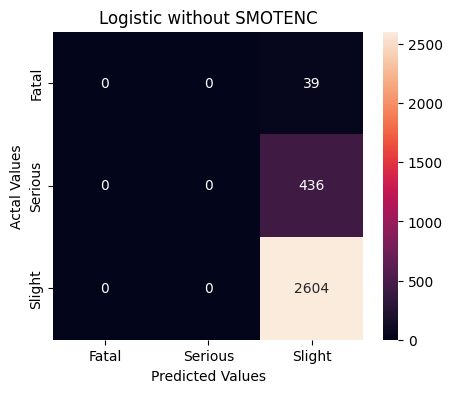

In [9]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Logistic without SMOTENC")
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.00      0.00      0.00       436
           2       0.85      1.00      0.92      2604

    accuracy                           0.85      3079
   macro avg       0.28      0.33      0.31      3079
weighted avg       0.72      0.85      0.78      3079



/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
# Start an MLflow experiment
n_estimators = 100
max_depth = 20

with mlflow.start_run():
    
    # Set tracking URI for MLflow
    mlflow.set_tracking_uri("http://localhost:5000")

    # Start MLflow experiment
    mlflow.set_experiment("random_forest_experiment")

    # Log the hyperparameters
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Train the model
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Predict the test set
    y_pred = clf.predict(X_test)

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'micro')
    recall = recall_score(y_test, y_pred, average = 'micro')
    f1 = f1_score(y_test, y_pred, average = 'micro')

    # Log hyperparameters and evaluation metrics to MLflow
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    
    # Log model to MLflow
    mlflow.sklearn.log_model(model, "model_Random_forest_all")
   
    

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.89      0.02      0.04       436
           2       0.85      1.00      0.92      2604

    accuracy                           0.85      3079
   macro avg       0.58      0.34      0.32      3079
weighted avg       0.84      0.85      0.78      3079



/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

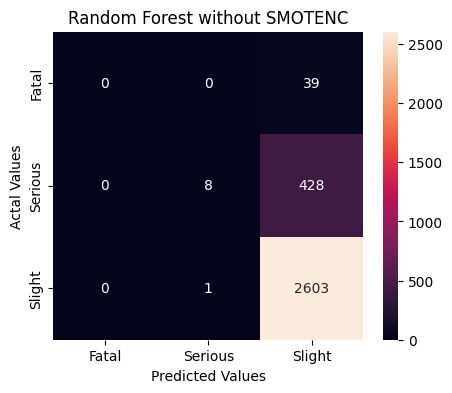

In [13]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Random Forest without SMOTENC")
plt.show()

#### Solving Imbalance Data


In [14]:
# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(30))

smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(data,labels)
X_n.shape, y_n.shape

((31245, 31), (31245,))

In [15]:
from sklearn.model_selection import train_test_split

data = X_n
labels = y_n
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.25, random_state = 42, stratify = labels)

In [16]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Set tracking URI for MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Start MLflow experiment
mlflow.set_experiment("logistic_regression_experiment")

# Define hyperparameters
C = 0.2
penalty = 'l2'


# Train model
with mlflow.start_run():
    # Create logistic regression model
    model = LogisticRegression(C=C, penalty=penalty, random_state=42, solver = 'saga')

    # Fit model on training data
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'micro')
    recall = recall_score(y_test, y_pred, average = 'micro')
    f1 = f1_score(y_test, y_pred, average = 'micro')

    # Log hyperparameters and evaluation metrics to MLflow
    mlflow.log_param("message", "After SMOTENC")
    mlflow.log_param("C", C)
    mlflow.log_param("penalty", penalty)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)

    # Log model to MLflow
    mlflow.sklearn.log_model(model, "model_logistic_regression_all")

/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2604
           1       0.53      0.60      0.56      2604
           2       0.68      0.61      0.64      2604

    accuracy                           0.62      7812
   macro avg       0.62      0.62      0.62      7812
weighted avg       0.62      0.62      0.62      7812



In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1664,  747,  193],
       [ 498, 1564,  542],
       [ 391,  624, 1589]])

In [19]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])


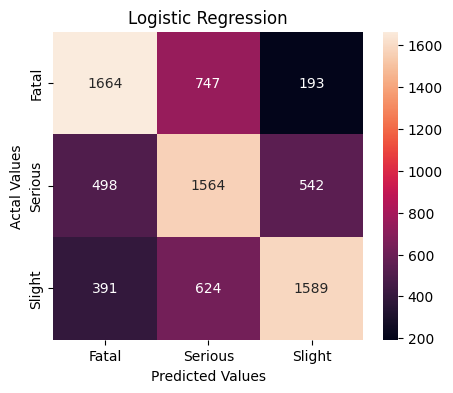

In [20]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Logistic Regression")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
# Start an MLflow experiment
n_estimators = 100
max_depth = 25

with mlflow.start_run():
    
    # Set tracking URI for MLflow
    mlflow.set_tracking_uri("http://localhost:5000")

    # Start MLflow experiment
    mlflow.set_experiment("random_forest_experiment")

    # Log the hyperparameters
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("Message","After SMotenc")

    # Train the model
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Predict the test set
    y_pred = clf.predict(X_test)

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'micro')
    recall = recall_score(y_test, y_pred, average = 'micro')
    f1 = f1_score(y_test, y_pred, average = 'micro')

    # Log hyperparameters and evaluation metrics to MLflow
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    
    # Log model to MLflow
    mlflow.sklearn.log_model(model, "random_forest_all")
    # End the MLflow experiment
    mlflow.end_run()

   
    

In [22]:
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2604
           1       0.90      0.86      0.88      2604
           2       0.86      0.90      0.88      2604

    accuracy                           0.92      7812
   macro avg       0.92      0.92      0.92      7812
weighted avg       0.92      0.92      0.92      7812



In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[2576,    4,   24],
       [   5, 2239,  360],
       [  10,  255, 2339]])

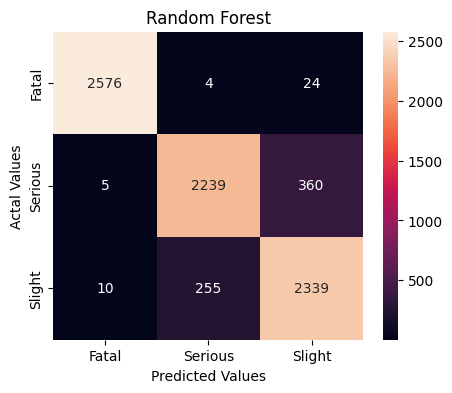

In [24]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Random Forest")
plt.show()

In [25]:
import joblib

# Assuming your model object is named `model`
# Save the model to a file using joblib
joblib.dump(clf, 'random_model.joblib')


['random_model.joblib']

In [26]:
# Define hyperparameters
C = 0.1
penalty = 'elasticnet'
l1_ratio = 0.9
solver = 'saga'

# Train model
with mlflow.start_run():
    # Create logistic regression model
    model = LogisticRegression(C=C, penalty=penalty, l1_ratio=l1_ratio, solver=solver, random_state=42)

    # Fit model on training data
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    # Log hyperparameters and evaluation metrics to MLflow
    mlflow.log_param("message", "After SMOTENC")
    mlflow.log_param("C", C)
    mlflow.log_param("penalty", penalty)
    mlflow.log_param("l1_ratio", l1_ratio)
    mlflow.log_param("solver", solver)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)

    # Log model to MLflow
    mlflow.sklearn.log_model(model, "model_logistic_regression_all")


/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2604
           1       0.53      0.60      0.57      2604
           2       0.68      0.61      0.65      2604

    accuracy                           0.62      7812
   macro avg       0.62      0.62      0.62      7812
weighted avg       0.62      0.62      0.62      7812



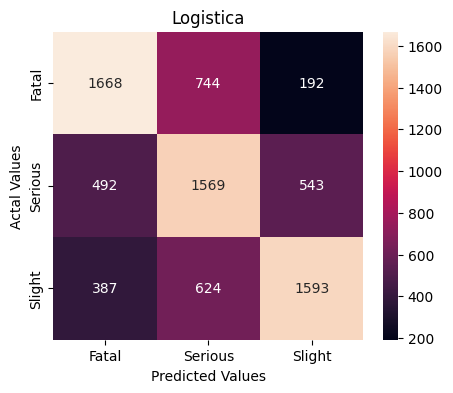

In [27]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Logistica")
plt.show()

In [28]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score


# One-vs-All approach with RBF kernel and C=1
svm_ova_rbf = OneVsRestClassifier(SVC(kernel='rbf', C=1))
svm_ova_rbf.fit(X_train, y_train)
y_pred_ova_rbf = svm_ova_rbf.predict(X_test)
accuracy_ova_rbf = accuracy_score(y_test, y_pred_ova_rbf)
print("One-vs-All with RBF kernel and C=1 Accuracy:", accuracy_ova_rbf)

# One-vs-One approach with linear kernel and C=10
svm_ovo_linear = OneVsOneClassifier(SVC(kernel='linear', C=10))
svm_ovo_linear.fit(X_train, y_train)
y_pred_ovo_linear = svm_ovo_linear.predict(X_test)
accuracy_ovo_linear = accuracy_score(y_test, y_pred_ovo_linear)
print("One-vs-One with linear kernel and C=10 Accuracy:", accuracy_ovo_linear)



One-vs-All with RBF kernel and C=1 Accuracy: 0.6931643625192012
One-vs-One with linear kernel and C=10 Accuracy: 0.6285202252944189


In [29]:
classif_re = classification_report(y_test,y_pred_ova_rbf)
print(classif_re)


              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2604
           1       0.61      0.62      0.62      2604
           2       0.71      0.70      0.70      2604

    accuracy                           0.69      7812
   macro avg       0.69      0.69      0.69      7812
weighted avg       0.69      0.69      0.69      7812



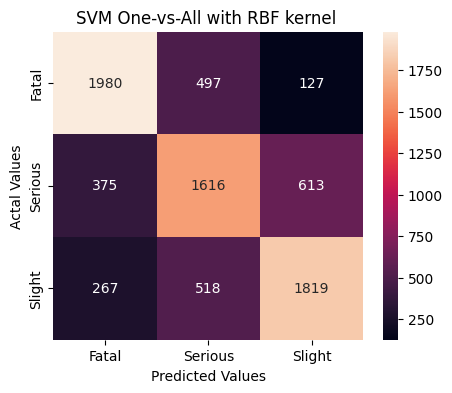

In [31]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_ova_rbf)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("SVM One-vs-All with RBF kernel ")
plt.show()

In [30]:
classif_re = classification_report(y_test,y_pred_ovo_linear)
print(classif_re)


              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2604
           1       0.54      0.63      0.58      2604
           2       0.71      0.62      0.66      2604

    accuracy                           0.63      7812
   macro avg       0.64      0.63      0.63      7812
weighted avg       0.64      0.63      0.63      7812



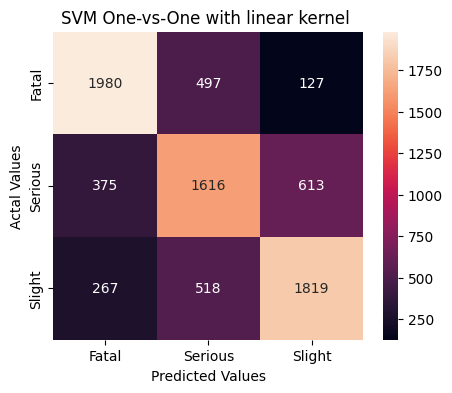

In [32]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_ova_rbf)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("SVM One-vs-One with linear kernel ")
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# define SVM model
svm = SVC()

# define parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 4]}

# define cross-validation object
cv = 5  # number of folds
scoring = 'accuracy'  # evaluation metric for model selection
grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring=scoring)

# fit grid search to training data
grid_search.fit(X_train, y_train)

# get best model and its accuracy on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print results
print('Best parameters:', grid_search.best_params_)
print('Best accuracy:', grid_search.best_score_)
print('Test accuracy:', accuracy)


Best parameters: {'C': 10, 'degree': 4, 'kernel': 'poly'}
Best accuracy: 0.805231686229772
Test accuracy: 0.8063236047107015


In [40]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8063236047107015

In [55]:
# Start an MLflow experiment
C = 10
degree = 4
kernel = 'poly'

with mlflow.start_run():
    
     # Start MLflow experiment
    mlflow.set_experiment("svm_experiment")

    # Log the hyperparameters
    mlflow.log_param("C", C)
    mlflow.log_param("degree", degree)
    mlflow.log_param("kernel",kernel)

    # Train the model
    svm = best_model
    

    # Predict the test set
    y_pred = svm.predict(X_test)

    

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    # Log hyperparameters and evaluation metrics to MLflow
    mlflow.log_param("message", "After SMOTENC")
    mlflow.log_param("C", C)
    mlflow.log_param("degree", degree)
    mlflow.log_param("kernel", kernel)
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)

    

    # Log the model
    mlflow.sklearn.log_model(svm, "svm_model")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
    # End the MLflow experiment
    mlflow.end_run()



Model saved in run bdc6301151494706947f8eee90ed1b30


In [56]:
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2604
           1       0.54      0.59      0.56      2604
           2       0.68      0.63      0.66      2604

    accuracy                           0.62      7812
   macro avg       0.63      0.62      0.62      7812
weighted avg       0.63      0.62      0.62      7812



In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[2438,  138,   28],
       [ 195, 1963,  446],
       [ 155,  551, 1898]])

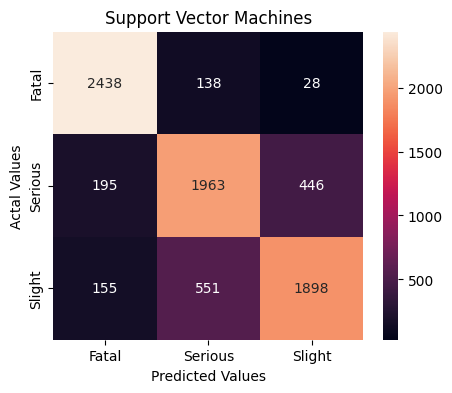

In [45]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Support Vector Machines")
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the logistic regression model
logistic = LogisticRegression()

# Define the hyperparameters to search
hyperparameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# get best model and its accuracy on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print results
print('Best parameters:', grid_search.best_params_)
print('Best accuracy:', grid_search.best_score_)
print('Test accuracy:', accuracy)


/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.6315022590886007
Test accuracy: 0.6223758320532514


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



# Define the logistic regression model
logistic = LogisticRegression()

# Define the hyperparameters to search
hyperparameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Perform GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5)
gridsearch.fit(X_train, y_train)


# get best model and its accuracy on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print results
print('Best parameters:', grid_search.best_params_)
print('Best accuracy:', grid_search.best_score_)
print('Test accuracy:', accuracy)


/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 10, 'degree': 4, 'kernel': 'poly'}
Best accuracy: 0.805231686229772
Test accuracy: 0.8063236047107015


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Set hyperparameters for the Gradient Boosting Classifier
params = {'n_estimators': 300,
          'max_depth': 7,
          'learning_rate': 0.1,
          'subsample': 0.8}

# Fit the Gradient Boosting Classifier with the training data
gb.fit(X_train, y_train)

# Predict on the testing set
y_pred = gb.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)


Accuracy: 0.7991551459293394


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Set the hyperparameters and their possible values
params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': uniform(loc=0.01, scale=0.1),
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Define the Randomized Search Cross-Validation with 5-fold cross validation
random_search = RandomizedSearchCV(gb, params, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print('Best Hyperparameters:', random_search.best_params_)
print('Accuracy:', random_search.best_score_)


Best Hyperparameters: {'learning_rate': 0.07335297107608947, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.9145650545305569


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
# Define hyperparameters
 
learning_rate = 0.07335297107608947
max_depth = 7
min_samples_split = 10 
n_estimators =300, 
subsample = 0.8
mlflow.set_experiment("gradient_boosting_experiment")

# Train model
with mlflow.start_run():
    # Create logistic regression model
    gb = GradientBoostingClassifier(learning_rate = learning_rate,
                                    max_depth = max_depth,
                                    min_samples_split = min_samples_split,
                                    n_estimators = 300,
                                    subsample = 0.8)

    # Fit model on training data
    gb.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = gb.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    # Log hyperparameters and evaluation metrics to MLflow
   
    mlflow.log_param("learning_rate" , learning_rate)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("min_samples_split", min_samples_split)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param('subsasmple', subsample)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)

    # Log model to MLflow
    mlflow.sklearn.log_model(model, "GradientBoosting")
    mlflow.end_run()


In [30]:
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2604
           1       0.89      0.86      0.88      2604
           2       0.86      0.89      0.87      2604

    accuracy                           0.91      7812
   macro avg       0.91      0.91      0.91      7812
weighted avg       0.91      0.91      0.91      7812



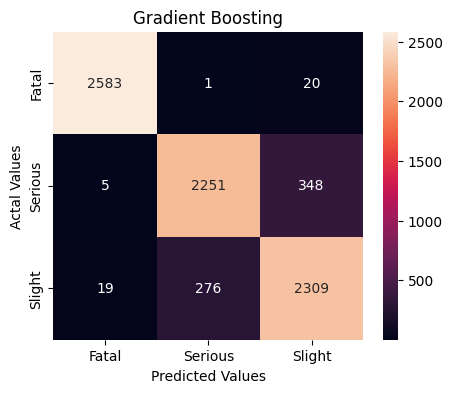

In [31]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Gradient Boosting")
plt.show()

In [32]:
import joblib

# Assuming your model object is named `model`
# Save the model to a file using joblib
joblib.dump(gb, 'gradientBoosting.joblib')


['gradientBoosting.joblib']

In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score



# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Set hyperparameters for the XGBoost classifier
params = {'max_depth': 3,
          'learning_rate': 0.1,
          'n_estimators': 100,
          'verbosity': 0,
          'objective': 'multi:softmax',
          'num_class': 3}

# Train the XGBoost classifier with the training data
xgb_clf.fit(X_train, y_train, eval_metric='mlogloss', verbose=True, eval_set=[(X_test, y_test)])

# Predict on the testing set
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)


[0]	validation_0-mlogloss:0.97395


/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-mlogloss:0.88815
[2]	validation_0-mlogloss:0.83053
[3]	validation_0-mlogloss:0.77675
[4]	validation_0-mlogloss:0.73357
[5]	validation_0-mlogloss:0.70325
[6]	validation_0-mlogloss:0.66968
[7]	validation_0-mlogloss:0.64554
[8]	validation_0-mlogloss:0.62523
[9]	validation_0-mlogloss:0.60576
[10]	validation_0-mlogloss:0.59192
[11]	validation_0-mlogloss:0.57399
[12]	validation_0-mlogloss:0.55655
[13]	validation_0-mlogloss:0.54807
[14]	validation_0-mlogloss:0.53534
[15]	validation_0-mlogloss:0.52768
[16]	validation_0-mlogloss:0.51906
[17]	validation_0-mlogloss:0.51242
[18]	validation_0-mlogloss:0.49670
[19]	validation_0-mlogloss:0.48671
[20]	validation_0-mlogloss:0.47792
[21]	validation_0-mlogloss:0.47263
[22]	validation_0-mlogloss:0.46732
[23]	validation_0-mlogloss:0.46232
[24]	validation_0-mlogloss:0.45625
[25]	validation_0-mlogloss:0.44998
[26]	validation_0-mlogloss:0.44760
[27]	validation_0-mlogloss:0.44222
[28]	validation_0-mlogloss:0.43981
[29]	validation_0-mlogloss:0.

In [70]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Create XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Create RandomizedSearchCV object
randomized_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=3,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the training data
randomized_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best Parameters: ", randomized_search.best_params_)
print("Best Accuracy: ", randomized_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.667 total time=   3.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.6;, score=0.784 total time=  40.0s
[CV 2/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=8, n_estimators=400, subsample=0.9;, score=0.905 total time= 1.2min
[CV 5/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=8, n_estimators=400, subsample=0.9;, score=0.912 total time= 1.2min
[CV 4/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.9;, score=0.918 total time= 1.3min
[CV 4/5] END colsample_bytree=1, gamma=0.4, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=0.5;, score=0.913 total time= 1.1min
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, 

[CV 4/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.661 total time=   3.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.6;, score=0.775 total time=  39.8s
[CV 5/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.6;, score=0.780 total time=  39.4s
[CV 4/5] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=8, n_estimators=400, subsample=0.9;, score=0.909 total time= 1.2min
[CV 3/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=500, subsample=0.9;, score=0.928 total time= 1.3min
[CV 2/5] END colsample_bytree=1, gamma=0.4, learning_rate=0.3, max_depth=6, n_estimators=400, subsample=0.5;, score=0.904 total time= 1.1min
[CV 1/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.5;, score=0.824 total time=  26.8

[CV 1/5] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.6;, score=0.729 total time=  10.4s
[CV 3/5] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.6;, score=0.738 total time=  10.6s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, n_estimators=400, subsample=0.5;, score=0.889 total time=  49.3s
[CV 1/5] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.5;, score=0.887 total time=  24.6s
[CV 4/5] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.5;, score=0.885 total time=  24.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.8;, score=0.917 total time=  50.7s
[CV 2/5] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.9;, score=0.864 total time=  

[CV 5/5] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5;, score=0.818 total time=  16.2s
[CV 5/5] END colsample_bytree=0.9, gamma=0.4, learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.6;, score=0.728 total time=  10.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, n_estimators=400, subsample=0.5;, score=0.889 total time=  52.4s
[CV 3/5] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.05, max_depth=9, n_estimators=100, subsample=0.5;, score=0.888 total time=  25.6s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.8;, score=0.911 total time=  50.7s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.3, max_depth=6, n_estimators=500, subsample=0.8;, score=0.913 total time=  50.7s
[CV 4/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=9, n_estimators=300, subsample=0.7;, score=0.912 total time= 1.2m

[CV 3/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.5;, score=0.808 total time=  10.8s
[CV 2/5] END colsample_bytree=1, gamma=0.4, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.5;, score=0.816 total time=  22.0s
[CV 5/5] END colsample_bytree=1, gamma=0.4, learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.5;, score=0.820 total time=  21.0s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=400, subsample=1;, score=0.923 total time= 1.2min
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.8;, score=0.765 total time=   4.3s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=2, n_estimators=100, subsample=0.8;, score=0.761 total time=   4.3s
[CV 3/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=500, subsample=0.7;, score=0.926 total time= 1.7min
[CV

In [76]:
print("Best Parameters: ", randomized_search.best_params_)

Best Parameters:  {'subsample': 0.9, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.6}


In [34]:
# Define hyperparameters

learning_rate = 0.3
max_depth = 10
gamma = 0
min_samples_split = 10 
n_estimators = 500
subsample = 0.9
colsample_bytree =0.6


mlflow.set_experiment("XG_boosting_experiment")

# Train model
with mlflow.start_run():
    # Create logistic regression model
    xgb_model =  xgb.XGBClassifier(learning_rate = learning_rate,
                                    max_depth = max_depth,
                                    n_estimators = n_estimators,
                                    subsample = subsample,
                                   gamma = gamma ,
                                  colsample_bytree = colsample_bytree)

    # Fit model on training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = xgb_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    # Log hyperparameters and evaluation metrics to MLflow
   
    mlflow.log_param("learning_rate" , learning_rate)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param('subsasmple', subsample)
    mlflow.log_param('gamma',gamma),
    mlflow.log_param('colsample_bytree',colsample_bytree)
    
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)

    # Log model to MLflow
    mlflow.sklearn.log_model(model, "XGBoosting")
    mlflow.end_run()


In [35]:
classif_re = classification_report(y_test,y_pred)
print(classif_re)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2604
           1       0.92      0.88      0.90      2604
           2       0.88      0.92      0.90      2604

    accuracy                           0.93      7812
   macro avg       0.93      0.93      0.93      7812
weighted avg       0.93      0.93      0.93      7812



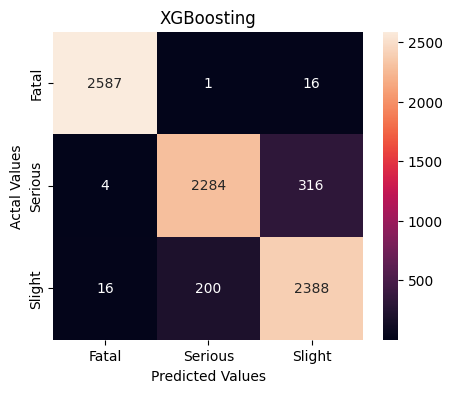

In [36]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("XGBoosting")
plt.show()

In [37]:
import joblib

# Assuming your model object is named `model`
# Save the model to a file using joblib
joblib.dump(xgb_model, 'xgb_model.joblib')


['xgb_model.joblib']